<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Cristina Vazquez Vargas  

**Fecha:** 08 de Marzo del 2021

**Expediente** : if721215
**Profesor:** Oscar David Jaramillo Zuluaga.

### LINK DE GITHUB:https://github.com/ACristinaVV/Tarea5_ACVAZQUEZ

# Tarea 5: Clase 9. Distribución de Probabilidad

In [1]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook
%matplotlib inline

> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>



### Procedimiento

#### Paso 1: Igualar $F(x)$=$U$  
$$\frac{2}{\pi}\sin^{-1}(\sqrt x)= U $$ 

#### Paso 2: Despejar $x$
$$sin^{-1}(\sqrt x)= \frac{U\pi}{2} $$  
>$$sin(sin^{-1}(\sqrt x))= sin(\frac{U\pi}{2}) $$ </font>
>$${\sqrt x}= sin(\frac{U\pi}{2}) $$ </font>  
>$$ x= sin^{2}(\frac{U\pi}{2}) $$ </font>  

#### Paso 3. Comprobar que $U \sim U(0,1)$  
Si $U=0$ entonces $$sin^{2}(\frac{U\pi}{2})=0$$  
Si $U=1$ entonces $$sin^{2}(\frac{U\pi}{2})=1$$  
Por lo tanto, $U \sim U(0,1)$ 

#### Paso 4: Encontrar $f(x)$
$$\frac{dF(x)}{dx}$$
donde $$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$ 
Consecuencia de esto  
$$\frac{1}{\pi\sqrt{x}\sqrt{1-x}}$$
#### Paso 5: Graficar $x$ (histograma) y $f(x)$ para comprobar lo calculado anteriormente


In [2]:
def Distribucion (N):
    return (np.sin((np.pi/2)*(np.random.random(N))))**2

In [3]:
N=10000
X = Distribucion(N)

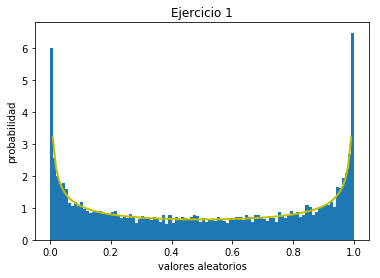

In [4]:
x = np.arange(0.01,1,0.01)
y= 1/((np.pi*np.sqrt(x))*(np.sqrt(1-x)))


plt.plot(x,y,linewidth=2,color='y')
plt.hist(X,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('Ejercicio 1')
plt.show()

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

In [6]:
#Función que genera una distribución discreta que vimos en clase
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [7]:
# Función que calcula la probabilidad acumulada de manera optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [8]:
#Función que genera un histograma que vimos en clase
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

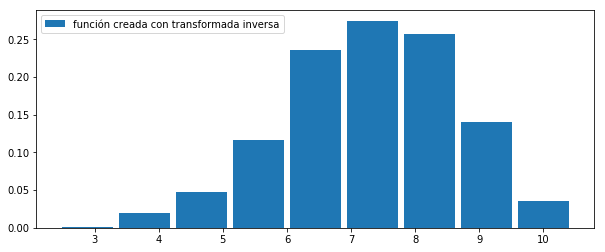

In [9]:
#Condiciones del ejercicio
n = 10
p = 0.7
N = 1000

#Calculo la probabilidad acumulada
p_acum = P_acum_Binomial_o(n,p)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)
plot_histogram_discrete(d_binomial, 'función creada con transformada inversa')
